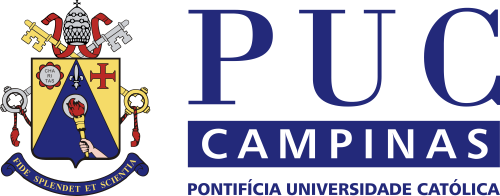



# Exercícios de Visualização de Dados 📖 🪐

*PUC - Programa de Residência em Tecnologia e Programação Python*

**Prof. José Guilherme Picolo**

**Feito por:**

[Vinicius Abreu](https://www.linkedin.com/in/vs-abreu/) 👨‍💻 🚀

[Riqueli Silva](https://www.linkedin.com/in/riquelisilva/) 👩‍💻 🚀

[Laís Barreto Vieira](https://www.linkedin.com/in/lais-barreto/) 👩‍💻 🚀

--------------------------------------------------------------------------------

**Líder do Grupo:** Vinicius da Silva Abreu

**RA:** 23029885

**Arquivo utilizado:** penguins.csv


[Link do arquivo com os dados](https://github.com/vinnedev/data-visualization/blob/main/penguins.csv) - penguins.csv

--------------------------------------------------------------------------------

# Análise e visualização de dados (Pinguins)

## Processos
- 1. Importação de Bibliotecas e Conjunto de Dados
- 2. Análise Exploratória de Dados
- 3. Visualização do Conjunto de Dados
- 4. Análise dos dados plotados
- 5. Tratamento de valores para classificação
- 6. Construção do Modelo de Árvore de Decisão
- 7. Utilizando árvore de classificação na prática

## 1. Importação das bibliotecas

In [37]:
# Importações das lib's necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [38]:
# ignorar warning
import warnings
warnings.filterwarnings('ignore')

In [39]:
# download database
import requests

# URL do arquivo no GitHub | File path
url = "https://raw.githubusercontent.com/vinnedev/data-visualization/main/penguins.csv"
path = "penguins.csv"

def download_database():
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(path, "wb") as f:
                f.write(response.content)
                print(f"Arquivo '{path}' baixado do GitHub e alocado na pasta do projeto.")
        else:
            raise Exception(
                f"Erro ao baixar o arquivo do GitHub. Código de status: {response.status_code}"
            )
    except Exception as e:
        raise Exception(f"Erro: Não foi possível baixar o arquivo '{path}': {e}")

In [40]:
# Importando banco de dados
import os

if(os.path.exists("penguins.csv")):
    df = pd.read_csv("penguins.csv")
else:
      download_database()
      df = pd.read_csv("penguins.csv")

rename_columns = {
    "species": "especies",
    "island": "ilhas",
    "bill_length_mm": "comp_bico_mm",
    "bill_depth_mm": "prof_bico_mm",
    "flipper_length_mm": "comp_asa_mm",
    "body_mass_g": "massa_corporal_mm",
    "sex": "genero",
}

df.rename(
    columns=rename_columns,
    inplace=True,
)

df.head()

,especies,ilhas,comp_bico_mm,prof_bico_mm,comp_asa_mm,massa_corporal_mm,genero
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


penguins.csv: Dados para extração e classificação

- ESPECIES: Espécies dos pinguins (Chinstrap, Adélie, or Gentoo)
- COMP_BICO_MM: Comprimento do bico (mm)
- PROF_BICO_MM: Profundidade do bico (mm)
- COMP_ASA_MM: Comprimento das asas (mm)
- MASSA_CORPORAL_G: Massa corporal (g)
- ILHAS: Nome das Ilhas (Dream, Torgersen, or Biscoe)
- GENERO: Gênero dos pinguins

In [41]:
# Checando dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   especies           344 non-null    object 
 1   ilhas              344 non-null    object 
 2   comp_bico_mm       342 non-null    float64
 3   prof_bico_mm       342 non-null    float64
 4   comp_asa_mm        342 non-null    float64
 5   massa_corporal_mm  342 non-null    float64
 6   genero             333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 2. Análise exploratória de dados

In [42]:
# Verificando valores nulos no dataframe
df.isnull().sum()

especies              0
ilhas                 0
comp_bico_mm          2
prof_bico_mm          2
comp_asa_mm           2
massa_corporal_mm     2
genero               11
dtype: int64

In [43]:
# Percentagem de valores nulos no dataframe
round(df.isnull().sum()/len(df)*100,2)

especies             0.00
ilhas                0.00
comp_bico_mm         0.58
prof_bico_mm         0.58
comp_asa_mm          0.58
massa_corporal_mm    0.58
genero               3.20
dtype: float64

In [44]:
# Removendo valores nulos do dataframe
df.dropna(inplace=True)

In [45]:
# Verificando se os valores nulos foram removidos
df.isnull().sum()

especies             0
ilhas                0
comp_bico_mm         0
prof_bico_mm         0
comp_asa_mm          0
massa_corporal_mm    0
genero               0
dtype: int64

In [46]:
# Verificação de valores por espécies
df.especies.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: especies, dtype: int64

## 3. Visualização do dataframe

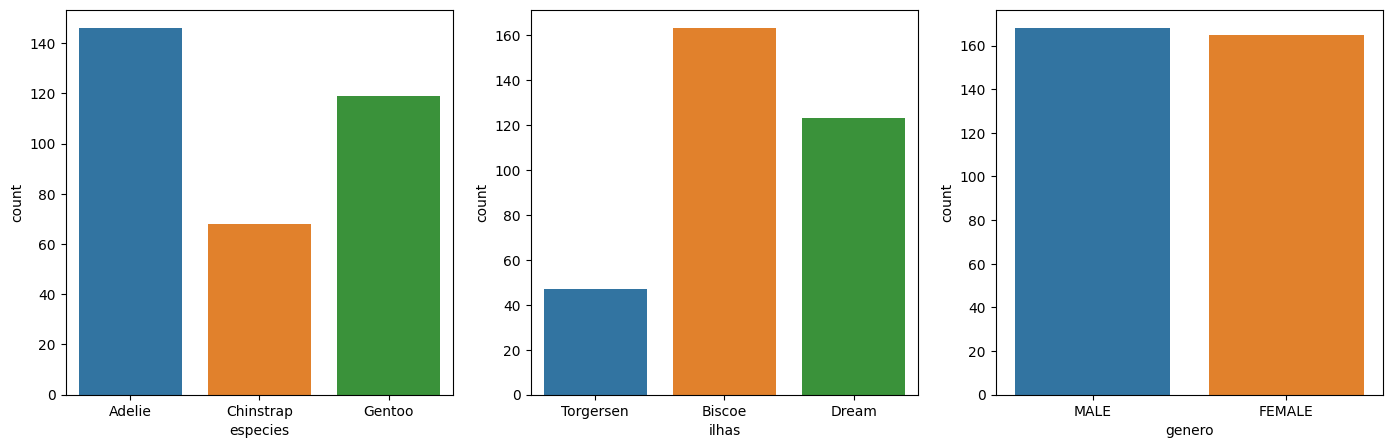

In [47]:
# Categorical Variables
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.countplot(x = df.especies, data = df)
plt.subplot(1,3,2)
sns.countplot(x = df.ilhas, data = df)
plt.subplot(1,3,3)
sns.countplot(x = df.genero, data = df)
plt.show()

In [48]:
# Descrição dos valores numéricos
df.describe()

,comp_bico_mm,prof_bico_mm,comp_asa_mm,massa_corporal_mm
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


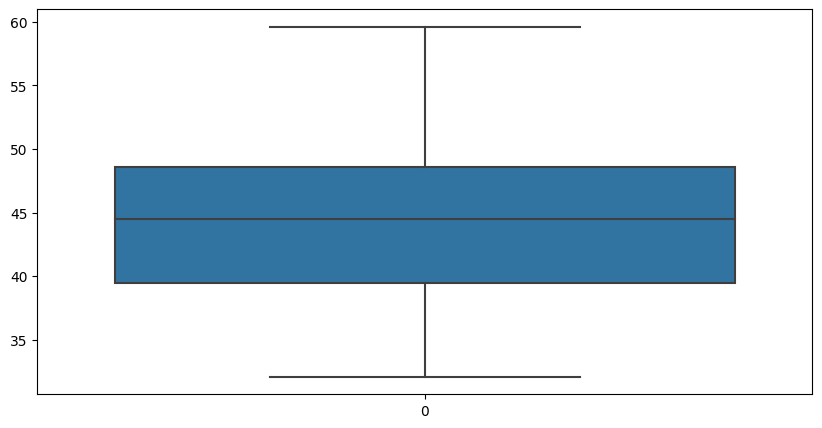

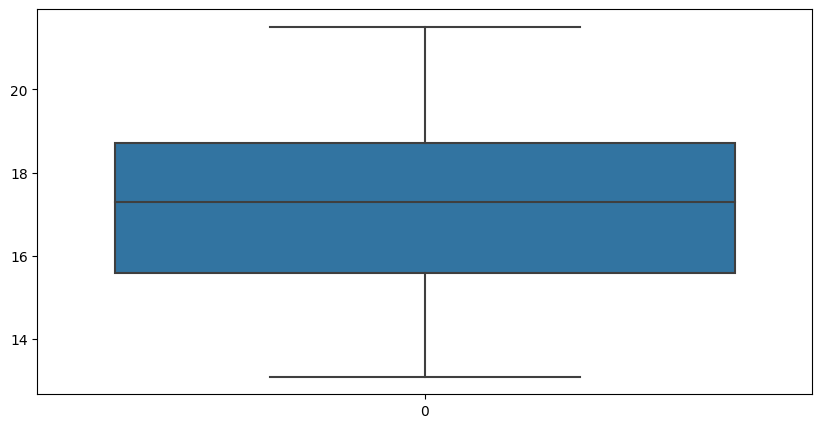

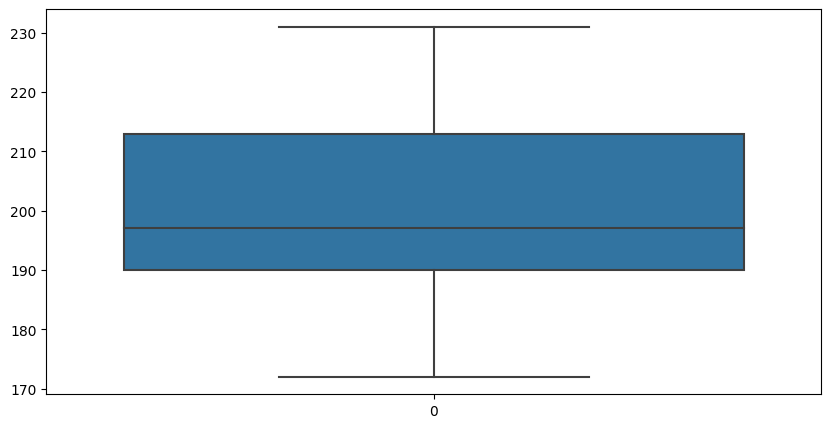

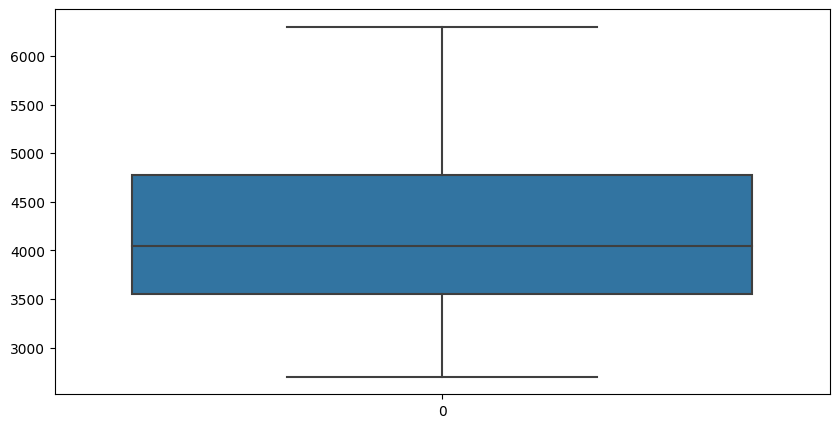

In [49]:
# Distribuição de valores
# Bloxplot para visualização de possiveis outliers

values_boxplot = ['comp_bico_mm', 'prof_bico_mm', 'comp_asa_mm', 'massa_corporal_mm']

for i in values_boxplot:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])

In [50]:
# Correlação entre valores
df.corr()

,comp_bico_mm,prof_bico_mm,comp_asa_mm,massa_corporal_mm
comp_bico_mm,1.000000,-0.228626,0.653096,0.589451
prof_bico_mm,-0.228626,1.000000,-0.577792,-0.472016
comp_asa_mm,0.653096,-0.577792,1.000000,0.872979
massa_corporal_mm,0.589451,-0.472016,0.872979,1.000000


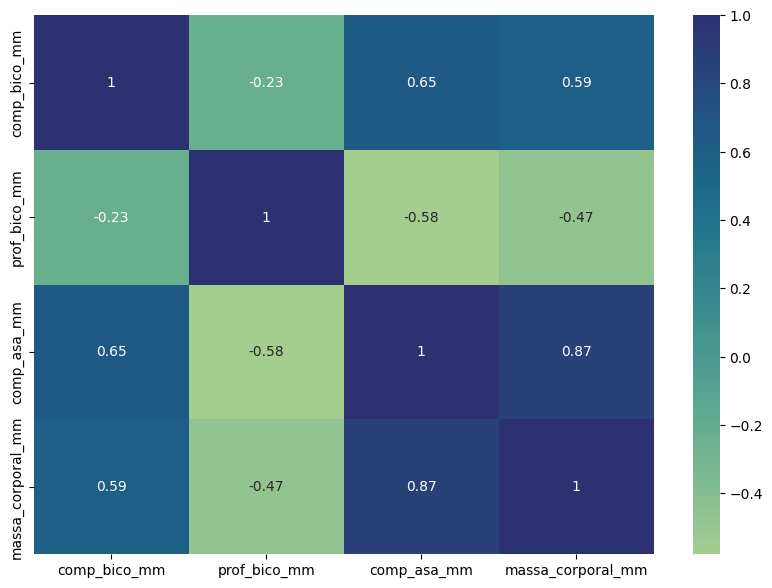

In [51]:
# Plotagem de mapa de correlações
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="crest");

- Maior correlação de valores entre **massa corporal** e **comprimento da asa**.

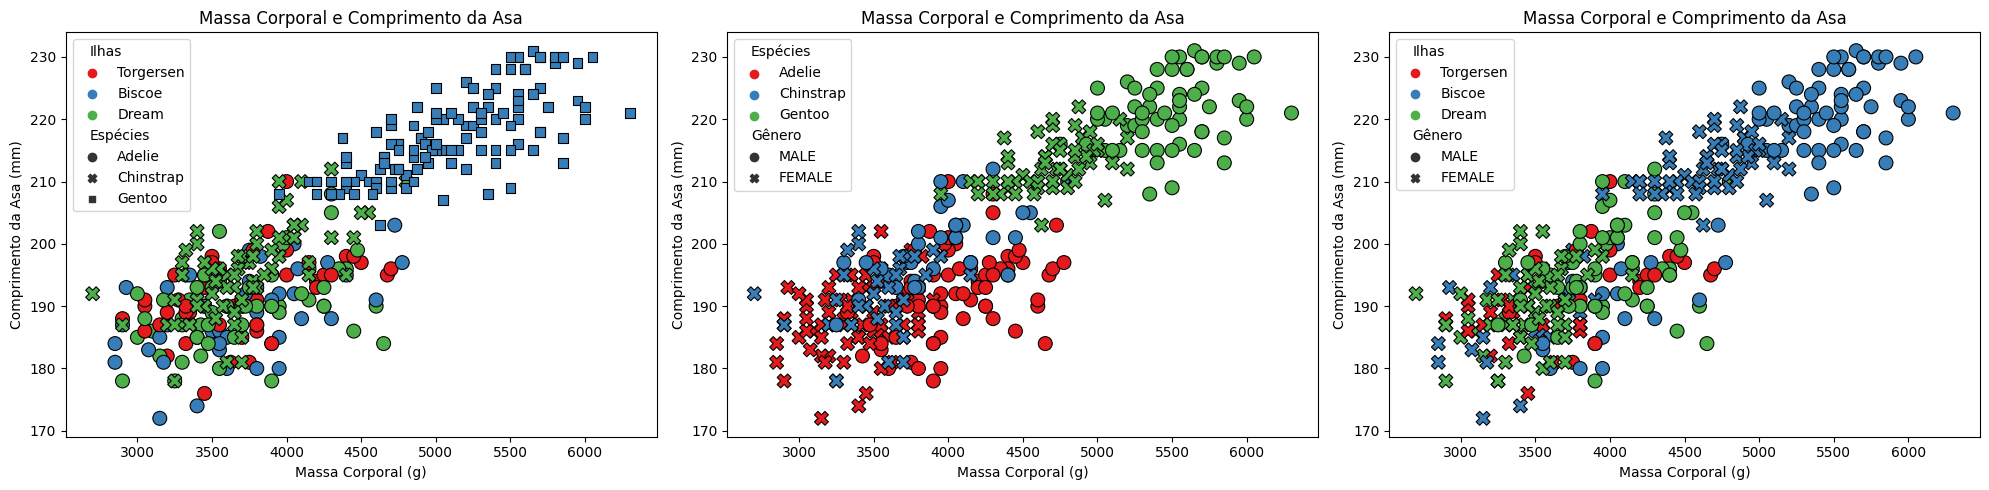



Quantidade de espécies em cada ilha: 

Ilhas
Biscoe       2
Dream        2
Torgersen    1
Name: Espécies, dtype: int64 


Quantidade de gêneros por espécie: 

Espécies
Adelie       2
Chinstrap    2
Gentoo       2
Name: Gênero, dtype: int64 


Quantidade de Machos e Fêmeas por Ilha: 

Ilhas      Gênero
Biscoe     FEMALE    80
           MALE      83
Dream      FEMALE    61
           MALE      62
Torgersen  FEMALE    24
           MALE      23
Name: Gênero, dtype: int64

Quantidade total de Macho e Fêmea (mostrando as espécies): 

Espécies   Gênero
Adelie     FEMALE    73
           MALE      73
Chinstrap  FEMALE    34
           MALE      34
Gentoo     FEMALE    58
           MALE      61
Name: Gênero, dtype: int64 


Quantidade de Pinguins por Ilha: 

Ilhas
Biscoe       163
Dream        123
Torgersen     47
Name: Espécies, dtype: int64


In [52]:
# Mapeando os valores
label_mapping = {
    'massa_corporal_mm': 'Massa Corporal (g)',
    'comp_bico_mm': 'Comprimento do Bico (mm)',
    'comp_asa_mm': 'Comprimento da Asa (mm)',
    'prof_bico_mm': 'Profundidade do Bico (mm)',
    'ilhas': 'Ilhas',
    'especies': 'Espécies',
    'genero': 'Gênero'
}

# Substituindo os rótulos dos dados
df_labels = df.rename(columns=label_mapping)

# Gráfico 1
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)

sns.scatterplot(x='Massa Corporal (g)', y='Comprimento da Asa (mm)', data=df_labels, hue='Ilhas', style='Espécies', palette='Set1', s=100, edgecolor='black')
plt.xlabel('Massa Corporal (g)')
plt.ylabel('Comprimento da Asa (mm)')
plt.title('Massa Corporal e Comprimento da Asa')

# Gráfico 2
plt.subplot(1, 3, 2)

sns.scatterplot(x='Massa Corporal (g)', y='Comprimento da Asa (mm)', data=df_labels, hue='Espécies', style='Gênero', palette='Set1', s=100, edgecolor='black')
plt.xlabel('Massa Corporal (g)')
plt.ylabel('Comprimento da Asa (mm)')
plt.title('Massa Corporal e Comprimento da Asa')

# Gráfico 3
plt.subplot(1, 3, 3)
sns.scatterplot(x='Massa Corporal (g)', y='Comprimento da Asa (mm)', data=df_labels, hue='Ilhas', style='Gênero', palette='Set1', s=100, edgecolor='black')
plt.xlabel('Massa Corporal (g)')
plt.ylabel('Comprimento da Asa (mm)')
plt.title('Massa Corporal e Comprimento da Asa')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()

# Imprimindo relações
print("\n")
print("Quantidade de espécies em cada ilha: \n")
print(f"{df_labels.groupby('Ilhas')['Espécies'].nunique()} \n")

print("\nQuantidade de gêneros por espécie: \n")
print(f"{df_labels.groupby('Espécies')['Gênero'].nunique()} \n")

print("\nQuantidade de Machos e Fêmeas por Ilha: \n")
print(df_labels.groupby(['Ilhas', 'Gênero'])['Gênero'].count())

print("\nQuantidade total de Macho e Fêmea (mostrando as espécies): \n")
print(f"{df_labels.groupby(['Espécies', 'Gênero'])['Gênero'].count()} \n")

print("\nQuantidade de Pinguins por Ilha: \n")
print(df_labels.groupby('Ilhas')['Espécies'].count())


## 4. Análise dos dados plotados

Através dos gráficos acima, é possível verificar algumas relações entre os pinguis.

Segundo os valores plotados:

- A espécie **Gentoo** tende a ser uma espécie **maior de tamanho** em relação as outras, pois a relação de **comprimento de asa** e **massa corporal** é maior em comparação as outras espécies.

- A espécie **Gentoo** tem uma **alta concentração** na ilha **Biscoe** em comparação com as outras espécies.

- A ilha **Torgersen** abriga apenas uma espécie (Adelie).

- A ilha de **Biscoe** abriga a maior quantidade de pinguins, porém a espécie **Chinstrap** não abriga nesta ilha.

- A ilha **Dream** só abriga as espécies **Chinstrap** e **Adelie**.

- A espécie **Adelie** tende a se relacionar melhor com outras espécies.





In [53]:
df.head()

,especies,ilhas,comp_bico_mm,prof_bico_mm,comp_asa_mm,massa_corporal_mm,genero
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## 5. Tratamento de valores para classificação

In [54]:
# Obter os valores da coluna espécie
v_especies = df.especies.unique()
v_ilhas = df.ilhas.unique()
v_genero = df.genero.unique()

print(v_especies)
print(v_ilhas)
print(v_genero)

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


In [55]:
# Label encoder
le = LabelEncoder()

In [56]:
# Fitting a coluna de ilhas, espécies e genero
df.ilhas = le.fit_transform(df.ilhas)
df.especies = le.fit_transform(df.especies)
df.genero = le.fit_transform(df.genero)

In [57]:
# Transformando os valores de espécies em números
# para possível classificação
print(f"Espécie values: {df.especies.unique()}")

# Copiar dataframe original para um novo dataframe
dtf = df.copy()


# Remover colunas desnecessárias para classificação
dtf.drop(['especies', 'ilhas', 'genero'], axis=1, inplace=True)

dtf.head()

Espécie values: [0 1 2]


,comp_bico_mm,prof_bico_mm,comp_asa_mm,massa_corporal_mm
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


## 6. Construção do Modelo de Árvore de Decisão

In [58]:
# Selecionar features e target
features = ['comp_bico_mm', 'prof_bico_mm', 'massa_corporal_mm', 'comp_asa_mm']
target = 'especies'

In [59]:
# Dividir os dados em conjunto de treino e teste
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 333)

In [60]:
# Inicializar e treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [61]:
# Treinando o modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [62]:
# Dados para previsão
print(X_test)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

     comp_bico_mm  prof_bico_mm  massa_corporal_mm  comp_asa_mm
271          48.5          14.1             5300.0        220.0
152          46.5          17.9             3500.0        192.0
258          44.0          13.6             4350.0        208.0
307          51.3          14.2             5300.0        218.0
95           40.8          18.9             4300.0        208.0
..            ...           ...                ...          ...
234          45.8          14.6             4200.0        210.0
155          45.4          18.7             3525.0        188.0
173          48.5          17.5             3400.0        191.0
114          39.6          20.7             3900.0        191.0
210          50.2          18.8             3800.0        202.0

[100 rows x 4 columns]


In [63]:
# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 97.00%


In [ ]:
# Construindo o modelo inicial
# Plotar a árvore de decisão

# Plotar a árvore de decisão
# Classificação de espécies por caracterísitcas corporais

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=features, class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

## 7. Árvore de decisão - Classificações

Na árvore de decisão, recebe caracteristicas corporais para classificar as espécies conforme valores.

## Exemplo:

- No valor raíz da árvore, os pinguins tendem a ser da espécie **Adelie**, caso o **Comprimento da Asa (mm)** seja menor ou igual a 206.5, **Comprimento do Bico (mm)** menor ou igual a 40.85 e **Profundidade do Bico (mm)** menor ou igual a 17.4

Com essas informações e com a árvore treinada, podemos gerar valores aleatórios das características corporal do penguin e obter uma classificação.


In [ ]:
# Dicionário de mapeamento para os rótulos das classes
mapeamento_classes = {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

# Mapeando os rótulos das classes para os nomes das espécies usando o dicionário
previsoes_nomes = [mapeamento_classes[classe] for classe in y_pred]

# Imprimindo as previsões com nomes das espécies do dataframe principal
print("Original Predict:", y_pred)
print("\n")
print("Predict:", previsoes_nomes)

## Utilizando árvore treinara para classificação

In [ ]:
import numpy as np

# Encontrar o menor e o maior valor de cada coluna
menor_comp_bico = df['comp_bico_mm'].min()
maior_comp_bico = df['comp_bico_mm'].max()

menor_prof_bico = df['prof_bico_mm'].min()
maior_prof_bico = df['prof_bico_mm'].max()

menor_massa_corporal = df['massa_corporal_mm'].min()
maior_massa_corporal = df['massa_corporal_mm'].max()

menor_comp_asa = df['comp_asa_mm'].min()
maior_comp_asa = df['comp_asa_mm'].max()

# Função para gerar valores aleatórios para as características
def gerar_valores_aleatorios():
    comp_bico_mm = np.random.uniform(menor_comp_bico, maior_comp_bico)
    prof_bico_mm = np.random.uniform(menor_prof_bico, maior_prof_bico)
    massa_corporal_mm = np.random.uniform(menor_massa_corporal, maior_massa_corporal)
    comp_asa_mm = np.random.uniform(menor_comp_asa, maior_comp_asa)

    return comp_bico_mm, prof_bico_mm, massa_corporal_mm, comp_asa_mm


In [ ]:
# Gerando valores aleatorios para usar a árvore treinada na prática
comp_bico_mm, prof_bico_mm, massa_corporal_mm, comp_asa_mm = gerar_valores_aleatorios()

# Usando a árvore de decisão para fazer a previsão
dados_para_prever = [[comp_bico_mm, prof_bico_mm, massa_corporal_mm, comp_asa_mm]]
previsao = clf.predict(dados_para_prever)

# Mapeando a previsão para o nome da espécie usando o dicionário de mapeamento de classes
mapeamento_classes = {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}
especie_prevista = mapeamento_classes[previsao[0]]

# Imprimindo os valores gerados e a espécie prevista
print(f"Valores gerados: comp_bico_mm: {comp_bico_mm:.2f}, prof_bico_mm: {prof_bico_mm:.2f}, massa_corporal_mm: {massa_corporal_mm:.2f}, comp_asa_mm: {comp_asa_mm:.2f}")
print(f"Espécie prevista: {especie_prevista}")